# Tugas Social Media Mining

Nama : Nadila Fitri Noviardhana

NIM : 164221006

Kelas : SD - A1


Kode Crawling di bawah ini

https://colab.research.google.com/drive/1XUY719vwMo1ET3k16899qx2lKcIIU0br?usp=sharing 

# Import data

In [55]:
import pandas as pd

data_twt = pd.read_csv("fufufafa1.csv")
data_twt

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1839087139625251010,Wed Sep 25 23:38:37 +0000 2024,26,Pagii Pagiii Hujan Guru Clara Nabrak Adik Fufu...,1839087139625251010,https://pbs.twimg.com/media/GYXAAbCa4AA_ErF.jpg,NaN,in,"Jakarta Pusat, DKI Jakarta",0,13,12,https://x.com/bohay_cantika69/status/183908713...,1828157674791534592,bohay_cantika69
1,1838955152281395257,Wed Sep 25 23:38:27 +0000 2024,0,@StefanAntonio__ Spek fufufafa banget nich barang,1839087097761902602,NaN,StefanAntonio__,in,Malang,0,0,0,https://x.com/sayajeha86/status/18390870977619...,1732264226260123648,sayajeha86
2,1839087018778964323,Wed Sep 25 23:38:08 +0000 2024,10,funfact konsultan politik si ndut &amp; fufufa...,1839087018778964323,NaN,NaN,in,NaN,0,2,1,https://x.com/awesonnee/status/183908701877896...,1004600273514295297,awesonnee
3,1839086810129117198,Wed Sep 25 23:37:18 +0000 2024,7,Ini melangkah lebih maju dibandingkan fufufafa...,1839086810129117198,NaN,NaN,in,NaN,0,0,3,https://x.com/Lisaamartatara6/status/183908681...,1613446145610772483,Lisaamartatara6
4,1839086196921872482,Wed Sep 25 23:37:03 +0000 2024,1,Peluncuran dua kapal perang baru yang di milik...,1839086748099641666,https://pbs.twimg.com/media/GYW_YLwW4AA68X8.jpg,alpirna,in,Indonesian,0,1,0,https://x.com/alpirna/status/1839086748099641666,224550169,alpirna
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,1838955152281395257,Wed Sep 25 17:27:35 +0000 2024,1,@StefanAntonio__ IPARKU TAK BIKIN MAUT,1838993765606039910,NaN,StefanAntonio__,in,"Teluk Betung Utara, Indonesia",0,0,0,https://x.com/Samsung10966010/status/183899376...,1605108695213346816,Samsung10966010
323,1838612578928595441,Wed Sep 25 17:25:07 +0000 2024,0,@i16_jan @yawes_piye Carlos bukan satu-satunya...,1838993147033960938,NaN,i16_jan,in,NaN,0,0,1,https://x.com/back2dust2/status/18389931470339...,1061990933460185088,back2dust2
324,1838993076410626357,Wed Sep 25 17:24:50 +0000 2024,0,Coba pake baju dengan tulisan penikmat gratifi...,1838993076410626357,NaN,NaN,in,"Kediri, Jawa Timur",0,0,0,https://x.com/arus_bawah11/status/183899307641...,3301271498,arus_bawah11
325,1838829130869313919,Wed Sep 25 17:24:43 +0000 2024,0,@yanto_sutandi @tham878 Wah ini si fufufafa yg...,1838993045079081459,NaN,yanto_sutandi,in,NaN,0,1,0,https://x.com/Cipluk1180709/status/18389930450...,1697125646626078721,Cipluk1180709


# Membuat Graph dan Visualisasi

<ipython-input-50-2e5244667111>:36: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Number of Mentions")


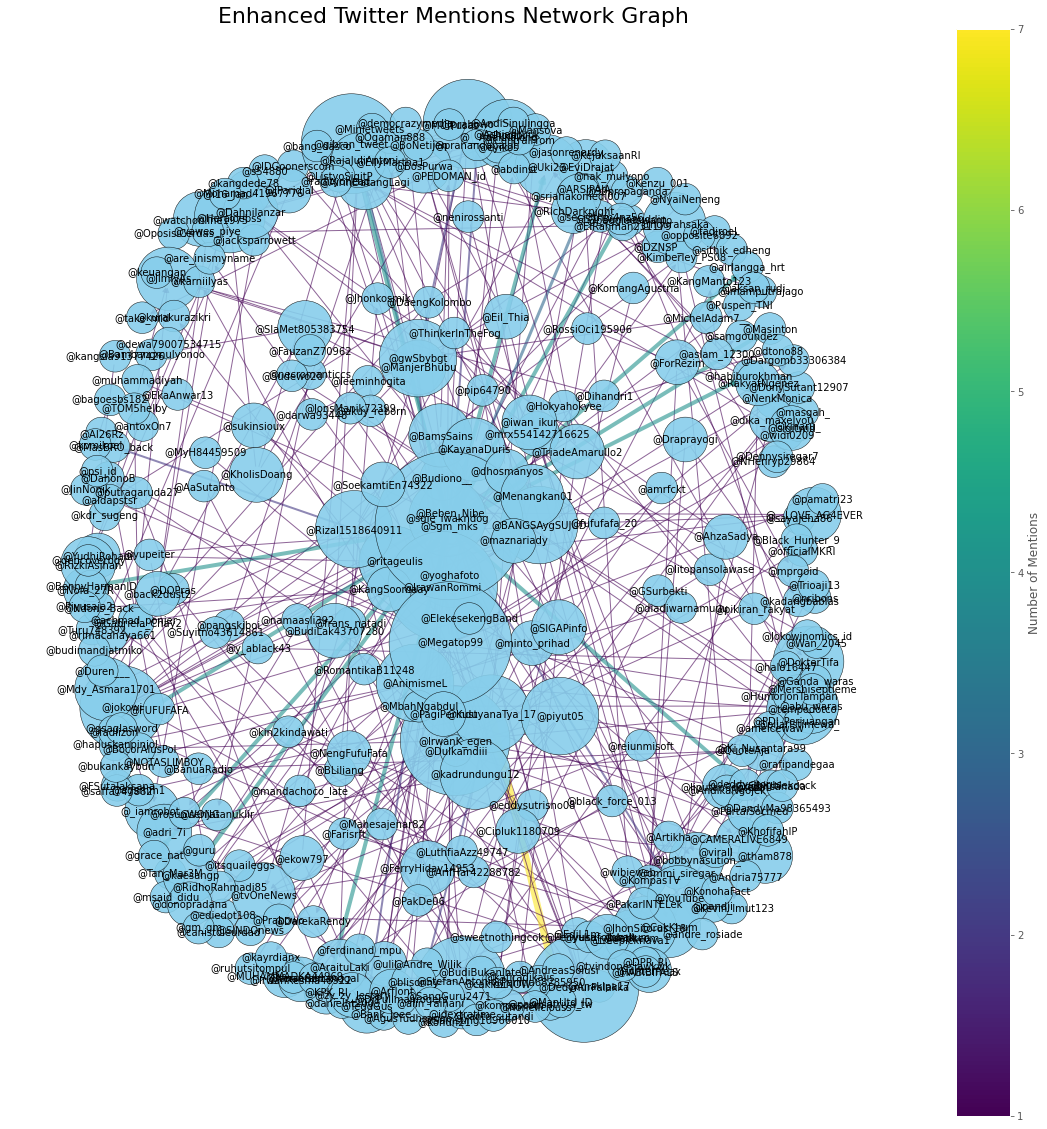

In [50]:
import networkx as nx
import matplotlib.pyplot as plt
import re
import pandas as pd

df = data_twt
G = nx.DiGraph()

for index, row in df.iterrows():
    author = f"@{row['username']}"  
    text = row['full_text']

    mentions = set(re.findall(r"@(\w+)", text)) 

    for mention in mentions:
        mention = f"@{mention}" 
        if G.has_edge(author, mention):
            G[author][mention]['weight'] += 1  
        else:
            G.add_edge(author, mention, weight=1)  

pos = nx.spring_layout(G, k=0.6, iterations=50)  

plt.figure(figsize=(20, 20))
plt.style.use("ggplot")

node_size = [1000 * nx.degree(G, node) for node in G]
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='skyblue', alpha=0.9, edgecolors="k")

edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_weights, width=edge_weights, edge_cmap=plt.cm.viridis, alpha=0.6)  

nx.draw_networkx_labels(G, pos, font_size=10, font_color="black", font_family="sans-serif")

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(edge_weights), vmax=max(edge_weights)))
sm.set_array([])
plt.colorbar(sm, label="Number of Mentions")

plt.title("Enhanced Twitter Mentions Network Graph", fontsize=22)

plt.axis("off")
plt.show()

# Centrality Measures

In [54]:
import networkx as nx
from operator import itemgetter

G_mention = G

graph_centrality = nx.degree_centrality(G_mention)
max_de = max(graph_centrality.items(), key=itemgetter(1))

graph_closeness = nx.closeness_centrality(G_mention)
max_clo = max(graph_closeness.items(), key=itemgetter(1))

graph_betweeness = nx.betweenness_centrality(G_mention, normalized=True, endpoints=False)
max_bet = max(graph_betweeness.items(), key=itemgetter(1))

print(f"Node dengan degree centrality tertinggi: {max_de}")
print(f"Node dengan closeness centrality tertinggi: {max_clo}")
print(f"Node dengan betweenness centrality tertinggi: {max_bet}")

Node dengan degree centrality tertinggi: ('@Sgm_mks', 0.06646525679758308)
Node dengan closeness centrality tertinggi: ('@DedynurPalakka', 0.03625377643504532)
Node dengan betweenness centrality tertinggi: ('@BANGSAygSUJUD', 3.661997619701547e-05)


In [53]:
df_mention = nx.to_pandas_edgelist(G)
df_mention.to_csv('mention2.csv', index=False)

df_mention

,source,target,weight
0,@sayajeha86,@StefanAntonio__,1
1,@AaSutanto,@StefanAntonio__,1
2,@AnakIpa17,@TeddGus,1
3,@Beben_Nibe,@__LOVE_AG4EVER,1
4,@Beben_Nibe,@jokowi,1
...,...,...,...
304,@back2dust2,@yawes_piye,1
305,@back2dust2,@i16_jan,1
306,@Cipluk1180709,@yanto_sutandi,1
307,@Cipluk1180709,@tham878,1


# Preprocessing

In [11]:
from nltk import sent_tokenize 
from nltk import word_tokenize 
from nltk.corpus import stopwords
import regex as re

def preprocess(doc): 
    doc = re.sub(r'http\S+|www\S+|t\.co\S+', '', doc)

    sents = word_tokenize(doc)
    sents_tok = list() 

    for s in sents:
        s = s.strip().lower() # case folding dan menghilangkan new line 
        s = s.replace("\n", " ") # menggantikan \n dengan spasi 
        s = re.sub(r'[^a-zA-Z0-9 ]', ' ', s) # menghapus simbol 
        s = re.sub(' +', ' ', s) # menghapus repetitive space 
        sents_tok.append(s)

    return " ".join(sents_tok)

docs_clear = list() 
for d in data_twt["full_text"]: 
    docs_clear.append(preprocess(d))

docs_clear


['pagii pagiii hujan guru clara nabrak adik fufufafa di pecat',
 '  stefanantonio  spek fufufafa banget nich barang',
 'funfact konsultan politik si ndut   amp   fufufafa emg benchmarking campaign pilpres dari bongbong   amp   duterte bahkan strategi joget2 gimmick gemoy nyebar hoax lewat tiktok ya plek ketiplek adaptasi dari pinoy wkwkwkwk',
 'ini melangkah lebih maju dibandingkan fufufafa yg cuma bisa di kaskus aja sama syahrini',
 'peluncuran dua kapal perang baru yang di miliki indonesia untuk ditempatkan di papua guru adik fufufafa pecat pdip gorontalo nabrak tidur putra mulyono   kapalperangpapua',
 '  stefanantonio  itu kan nama aslinya mbak flara kakak ipar fufufafa',
 'bisa dibayangkan betapa besar kerusakan yg dibuat 10 tahun terakhir     clara adik fufufafa p diddy pecat putra mulyono   2egin4cantik   gibrankaesangtidakjujur',
 '  teddgus fufufafa fufufafa gini in aja guys jangan terpancing esmosy si tedi wkrkwkr',
 'viral video murid dan guru di gorontalo video pasya pratiw

In [12]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

stop_docs = []

for doc in docs_clear:
    cleaned_doc = stopword.remove(doc)
    stop_docs.append(cleaned_doc)

stop_docs

['pagii pagiii hujan guru clara nabrak adik fufufafa pecat',
 '  stefanantonio  spek fufufafa banget nich barang',
 'funfact konsultan politik si ndut   amp   fufufafa emg benchmarking campaign pilpres bongbong   amp   duterte bahkan strategi joget2 gimmick gemoy nyebar hoax lewat tiktok plek ketiplek adaptasi pinoy wkwkwkwk',
 'melangkah lebih maju dibandingkan fufufafa yg cuma di kaskus aja sama syahrini',
 'peluncuran kapal perang baru miliki indonesia ditempatkan di papua guru adik fufufafa pecat pdip gorontalo nabrak tidur putra mulyono   kapalperangpapua',
 '  stefanantonio  kan nama aslinya mbak flara kakak ipar fufufafa',
 'dibayangkan betapa besar kerusakan yg dibuat 10 tahun terakhir     clara adik fufufafa p diddy pecat putra mulyono   2egin4cantik   gibrankaesangtidakjujur',
 '  teddgus fufufafa fufufafa gini in aja guys jangan terpancing esmosy si tedi wkrkwkr',
 'viral video murid guru gorontalo video pasya pratiwi toiti oknum murid guru man 1 gorontalo tersebar video pol

# WordCloud

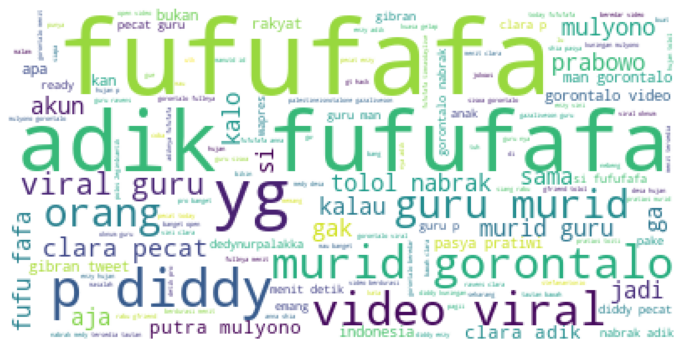

In [13]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

docs_string = ' '.join(stop_docs)
wordcloud = WordCloud(background_color="white").generate(docs_string)

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

plt.axis("off")
plt.show()

# Word Common Barplot

In [14]:
token = word_tokenize(docs_string)

from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

fdist1 = fdist.most_common(10)
fdist1

[('fufufafa', 294),
 ('guru', 114),
 ('adik', 104),
 ('gorontalo', 85),
 ('clara', 78),
 ('video', 62),
 ('mulyono', 59),
 ('pecat', 56),
 ('yg', 55),
 ('viral', 53)]

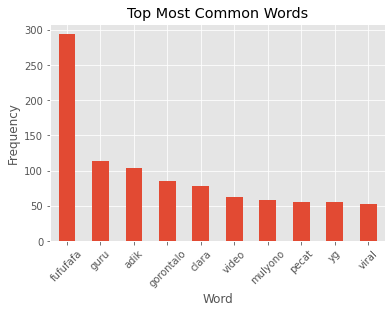

In [15]:
df_freq_tokens = pd.DataFrame.from_dict(fdist, orient='index', columns=['Frequency'])
df_freq_tokens.index.name = 'Word'

top_n = 10
df_top_n = df_freq_tokens.nlargest(top_n, 'Frequency')

df_top_n.plot(kind='bar', legend=False)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top Most Common Words')
plt.xticks(rotation=45)
plt.show()

# Esktraksi Fitur dengan Word2Vec

In [39]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np

tokenized_docs = [doc.split() for doc in stop_docs]

model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=2, sg=0)

def document_vector(doc):
    word_vectors = [model.wv[word] for word in doc if word in model.wv]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

doc_vectors = np.array([document_vector(doc) for doc in tokenized_docs])

doc_vectors = np.nan_to_num(doc_vectors)

doc_vectors


array([[-0.00142194,  0.01137531,  0.00016596, ..., -0.01567952,
        -0.00118813, -0.00076603],
       [ 0.00194052,  0.00495958,  0.00333129, ..., -0.00539548,
         0.0009526 ,  0.00263851],
       [-0.00032299,  0.00028164, -0.00165468, ..., -0.00717618,
         0.00126467, -0.00183083],
       ...,
       [-0.00168299,  0.00191094,  0.00046048, ..., -0.00986915,
         0.00481118, -0.00091354],
       [-0.00074874,  0.00320126,  0.00115757, ..., -0.00742915,
        -0.00199964, -0.00127255],
       [-0.00175081, -0.00269214,  0.00459619, ..., -0.00636661,
        -0.00346265, -0.00661046]])

# Penentuan K optimal

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

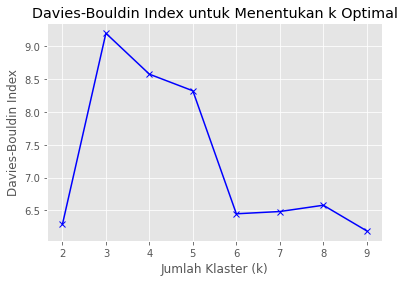

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

db_scores = []  

for k in range(2, 10): 
    km = KMeans(n_clusters=k, init='random', random_state=99)
    km.fit(doc_vectors)
    labels = km.labels_
    db_scores.append(davies_bouldin_score(X.toarray(), labels))  

plt.plot(range(2, 10), db_scores, 'bx-')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index untuk Menentukan k Optimal')
plt.show()


# Pemodelan Clustering

In [41]:
kmeans = KMeans(n_clusters=3, random_state=99)
kmeans.fit(doc_vectors)

labels = kmeans.labels_
print(labels)

[2 1 0 1 1 0 1 2 2 1 1 1 0 1 1 0 1 1 1 1 2 2 0 0 0 0 0 2 2 1 0 1 0 1 1 2 1
 0 2 1 0 0 0 1 1 0 2 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 2 1 0 1 2 1 0 1 0
 0 1 0 1 2 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 2 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 2 2 1 2 1 1 1 1
 2 2 1 0 1 2 1 1 1 2 0 1 1 0 2 0 2 1 0 0 0 1 0 2 1 0 1 1 1 0 1 1 2 2 0 1 1
 2 2 2 2 2 1 1 1 0 2 1 0 2 1 1 1 0 2 0 1 1 2 1 2 1 2 1 2 2 1 2 1 1 2 1 0 0
 0 1 2 1 2 1 2 0 2 0 1 0 2 0 0 0 0 1 1 1 0 0 2 0 1 2 2 1 2 1 2 1 1 0 2 2 2
 2 1 1 1 1 2 2 2 2 1 1 0 1 1 2 2 2 1 2 1 1 2 1 1 1 2 1 2 0 0 1 2 0 1 1 2 0
 2 1 2 1 0 2 2 0 1 0 0 1 2 0 2 1 2 0 2 2 1 1 2 1 1 2 0 0 1 1 0]


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Evaluasi

In [46]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(doc_vectors, labels)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.18479257646164035


# Visualisasi

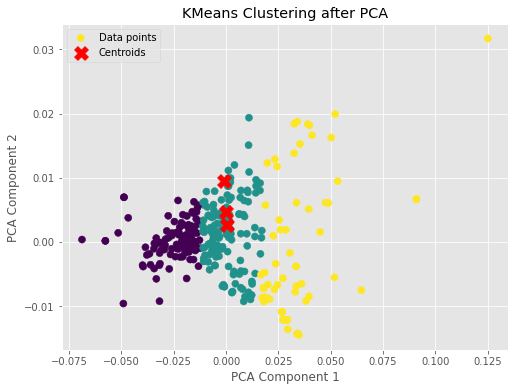

In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(doc_vectors)
D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis', label='Data points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering after PCA')
plt.legend()
plt.show()


# Pembagian tiap cluster dan Wordcloud

In [42]:
from collections import defaultdict

clustered_docs = defaultdict(list)

for i, cluster_id in enumerate(labels):
    clustered_docs[cluster_id].append({
        'username': data_twt['username'].iloc[i],
    })

for cluster_id, docs in clustered_docs.items():
    print(f"Cluster {cluster_id}:")
    for doc in docs[:10]:  
        print(f"  username: {doc['username']}")


Cluster 2:
  username: bohay_cantika69
  username: AnakIpa17
  username: trustook47
  username: GSurbekti
  username: akucumabadut_
  username: Urpin168
  username: sadewo77465388
  username: salsacopy31319
  username: aslam_12300
  username: amelcewaw
Cluster 1:
  username: sayajeha86
  username: Lisaamartatara6
  username: alpirna
  username: Qk1ng2
  username: Beben_Nibe
  username: leeminhogita
  username: RenaHoston178
  username: Al26Rz
  username: iniironman
  username: Eil_Thia
Cluster 0:
  username: awesonnee
  username: AaSutanto
  username: BLiliang
  username: fufufafa_20
  username: ElRahman231179
  username: Beben_Nibe
  username: ArwahMiliter
  username: Budiono__
  username: samarchitect86
  username: NengFufuFafa


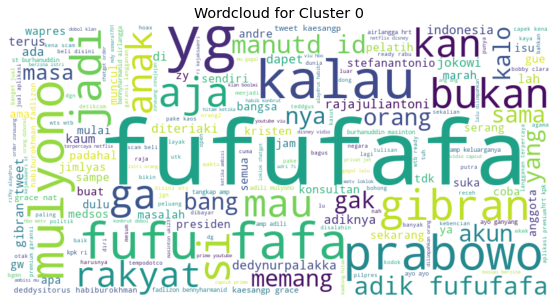

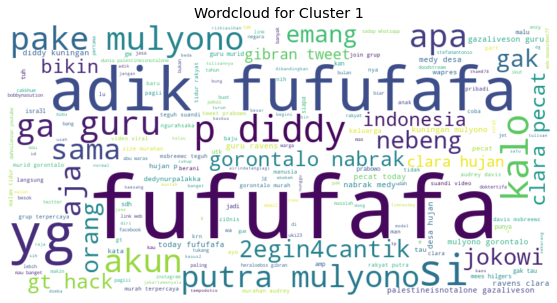

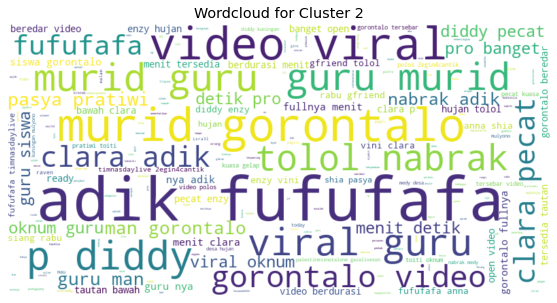

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

clusters = set(labels)  
for cluster in clusters:
    cluster_indices = [i for i, label in enumerate(labels) if label == cluster]

    cluster_text = " ".join([stop_docs[i] for i in cluster_indices])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Wordcloud for Cluster {cluster}')
    plt.show()
